## Hehe Playground

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np;

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, ys_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

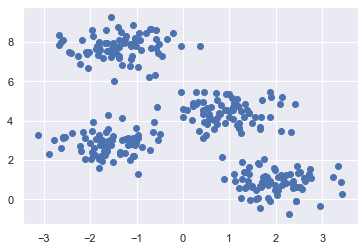

In [4]:
plt.scatter(X[:, 0], X[:, 1]);

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

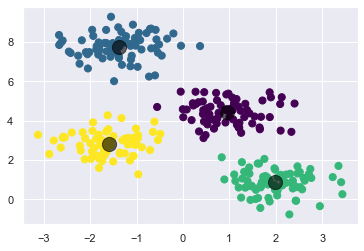

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.6);

In [8]:
from sklearn.metrics import pairwise_distances_argmin

In [9]:
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                        for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

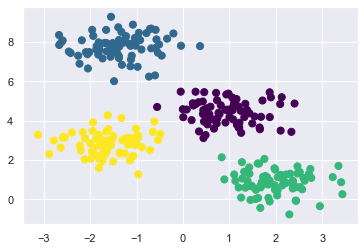

In [10]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap='viridis')

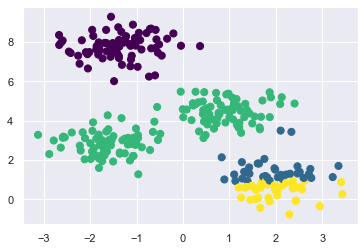

In [11]:
"""The globally optimal result may not be achieved"""
centers, labels = find_clusters(X, 4, rseed=0);
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap = 'viridis')

In [12]:
"""The number of clusters must be selected beforehandA"""
labels = KMeans(6, random_state=0).fit_predict(X)

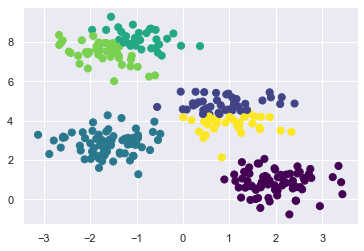

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [14]:
"""means is limited to linear cluster boundaries"""

from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(200, noise=.05, random_state=0);

In [16]:
labels = KMeans(2, random_state=0).fit_predict(X)

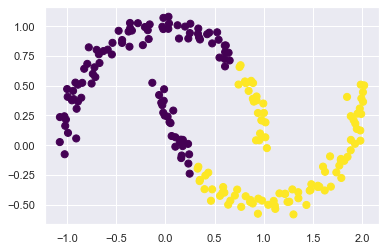

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = labels, s=50, cmap='viridis')

In [18]:
"""Using SpectralClustering """
"""It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:"""
from sklearn.cluster import SpectralClustering

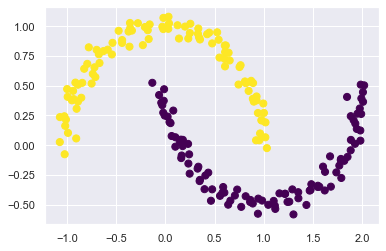

In [19]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap='viridis')

## MiniBatchKmeans

In [20]:
from sklearn.datasets import load_digits

In [21]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [32]:
K_mean = KMeans(n_clusters=10, random_state=2)
cluster = K_mean.fit_predict(digits.data)
K_mean.cluster_centers_.shape

(10, 64)

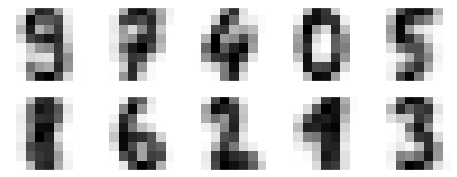

In [38]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = K_mean.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [40]:
from scipy.stats import mode

In [55]:
labels = np.zeros_like(cluster)
for i in range(10):
    mask = (cluster == i)
    labels[mask] = mode(digits.target[mask])[0]

In [56]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [57]:
print(labels)

[0 8 8 3 4 9 6 7 9 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 1 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 8 8 7 8 7 0 1 8 6 3 3 7 3 3 4 6 6 6 4 7 1 5 0 9
 5 1 8 1 0 0 1 7 6 3 2 1 7 4 6 3 1 3 3 8 7 8 8 4 3 8 4 0 5 7 6 9 6 1 7 5 4
 4 7 2 8 8 8 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 3 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 8 9 1 5 0 9 5 7 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 7 6 9 6 1 7 5 8 4 7 2 8 2 2 5 5 1 8 8 4 9 0 8 9 8 0 8 2
 3 4 9 6 7 9 5 0 8 2 3 4 5 6 7 8 7 0 8 2 3 4 5 6 7 8 9 0 9 5 9 6 9 0 9 8 9
 8 4 8 7 7 3 5 8 0 0 2 2 7 9 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 7 8 5 0 7 5 2 9
 2 0 0 8 7 6 3 2 8 7 4 6 3 8 3 7 8 7 6 8 4 3 8 4 0 9 3 6 7 6 8 7 5 4 4 7 2
 9 2 2 9 7 1 5 4 9 9 4 1 0 8 7 3 0 1 2 3 4 5 6 7 9 9 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 9 9 0 9 9 5 6 9 0 9 9 9 9 4 1 7 7 3 5 1 0 0 2 2 7 9 2 0 2 2
 6 3 9 7 9 9 4 6 6 6 4 9 1 9 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 1 6 3 1 3 9 1 7
 6 9 4 3 1 4 0 5 3 6 9 8 

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(digits.target, labels)

0.7918753478018921

<AxesSubplot:>

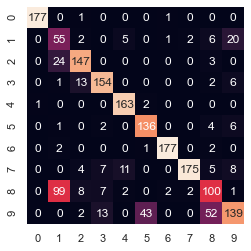

In [60]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)